# BLG454E Learning From Data - Tutorial 3

#### T.A. : Şeymanur Aktı, akti15@itu.edu.tr

This tutorial is prepared based on the exercises in Machine Learning Refined Textbook Chapter 4.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold

#python -m pip install numpy

### Exercise 4-3 

In this exercise we need to minimize softmax loss using gradient descent in order to find the linear bound between classes of the given imbalanced dataset.

First, let's load and examine the data.

In [5]:
# import training data 
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname,header=None))
    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

X shape:  (3, 100)
y shape:  (100, 1)


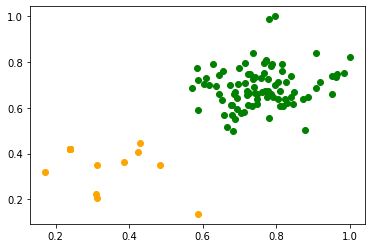

In [6]:
X, y = load_data("data/imbalanced_2class.csv")

print("X shape: ", X.shape)
print("y shape: ", y.shape)

class1 = X[:, np.argwhere(y==1)] 
class2 = X[:, np.argwhere(y==-1)]

plt.scatter(class1[1], class1[2], color="green")
plt.scatter(class2[1], class2[2], color="orange")
plt.show()

Next, we will implement the gradient descent on softmax function in order to find the soft bound that seperates two classes.

<br>
<center> $ \tilde{x}_{p} = \begin{bmatrix} 1\\x_{p}\end{bmatrix} \tilde{w} = \begin{bmatrix}b\\w \end{bmatrix} $ </center>
<br>
<center> $g(\tilde{w})= \sum_{p=1}^{P}log(1+e^{-y_{p}\tilde{x}_{p}^{T}\tilde{w}})$ </center>
<br>
<center> $ \nabla g (\tilde{w}) = - \sum_{p=1}^{P} \sigma(-y_{p}\tilde{x}_{p}^{T}\tilde{w}) y_{p}\tilde{x}_{p} $ </center>



In [16]:
### TODO: YOUR CODE GOES HERE ###
# gradient descent function for softmax cost/logistic regression 
    
def sigmoid(x):
    return 1/ (1 + np.exp(-x))
    
def softmax_grad(X,y):
    # Initializations 
    w = np.random.randn(3,1);        # random initial point
    alpha = 10**-2
    max_its = 2000
    
    for k in range(max_its):
        
        ## fill here 
        s = sigmoid(-y * (X.T @ w))
        grad_w = -X @ (s * y)
        
        w = w - alpha * grad_w
        
        
        
    return w

Then, let's plot and see the bound on data.

In [17]:
# plots everything 
def plot_all(X,y,w):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    
    # plot separator
    s = np.linspace(0,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    
    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.show()

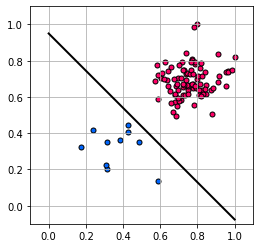

In [18]:
# load in data
X,y = load_data('data/imbalanced_2class.csv')

# run gradient descent
w = softmax_grad(X,y)

# plot points and separator
plot_all(X,y,w)

### Exercise 4-4 

In this exercise we need to use Newton's method in order to minimize the softmax loss and find the boundary between the classes of given overlapping dataset.

First, let's load and examine the data.

X shape:  (3, 100)
y shape:  (100, 1)


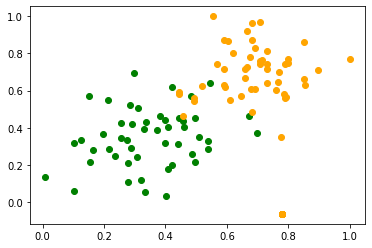

In [19]:
X,y = load_data('data/overlapping_2class.csv')
print("X shape: ", X.shape)
print("y shape: ", y.shape)

class1 = X[:, np.argwhere(y==1)] 
class2 = X[:, np.argwhere(y==-1)]

plt.scatter(class1[1], class1[2], color="green")
plt.scatter(class2[1], class2[2], color="orange")
plt.show()

Next, we will implement the Newton's method in order to estimate the optimum weights that gives the best boundary between the classes.

<br>

<center> $ w_{n+1} = w_{n} - H^{-1} \nabla g(w_{n}) $ </center>

<br>
    
<center> $ H = \sum_{p=1}^{P} \sigma(-y_{p}\tilde{x}_{p}^{T}\tilde{w}) (1- \sigma(-y_{p}\tilde{x}_{p}^{T}\tilde{w})) \tilde{x}_{p}\tilde{x}_{p}^{T} $ </center>


In [20]:
### TODO: YOUR CODE GOES HERE ###
# run newton's method
def newtons_method(x,y):
    # begin newton's method loop
    max_its = 20
    w = np.random.randn(3,1);        # random initial point

    for k in range(max_its):
        
        s = sigmoid(-y * (X.T @ w))
        grad_w = -X @ (s * y)
        
        H = ((s * (1-s)).T * X) @ X.T
        
        w = w - (np.linalg.inv(H) @ grad_w)
        
        # fill here
        
    return w

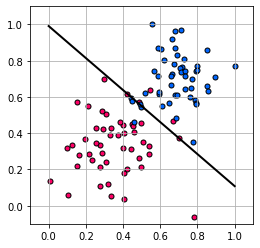

In [21]:
# load data
X,y = load_data('data/overlapping_2class.csv')

# run newtons method to minimize logistic regression or softmax cost
w = newtons_method(X,y)

# plot everything - including data and separator
plot_all(X,y,w)

### Exercise 4-7

In this experiment, we will find the margin boundary that seperates the classes of imbalanced dataset at Exercise 4-3.

We need to implement the gradient descent for minimizing the squared margin cost.

<br>
<center> $ g(\tilde{w}) = \sum_{p=1}^{P} max^{2}(0, 1-y_{p}\tilde{x}_{p}^{T}\tilde{w}) $ </center>
<br>
<center> $ \nabla g (\tilde{w}) = -2 \sum_{p=1}^{P} max(0, 1-y_{p}\tilde{x}_{p}^{T}\tilde{w})y_{p}\tilde{x}_{p}$ </center>

In [22]:
### TODO: YOUR CODE GOES HERE ###
# gradient descent function for softmax cost/logistic regression 
def squared_margin_grad(X,y):
    # Initializations 
    w = np.random.randn(3,1);        # random initial point
    alpha = 10**-2
    max_its = 2000
    
    for k in range(max_its):
        
        grad_w = -2 * np.sum(np.maximum(0, 1 - y * X.T @ w) * y * X.T, 0, keepdims=True).T
        
        w = w - alpha * grad_w
        
        ## fill here
        
    return w

In [23]:
# plots everything 
def plot_all_margin(X,y,w):
    # custom colors for plotting points
    red = [1,0,0.4]  
    blue = [0,0.4,1]
    
    # scatter plot points
    fig = plt.figure(figsize = (4,4))
    ind = np.argwhere(y==1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = red,edgecolor = 'k',s = 25)
    ind = np.argwhere(y==-1)
    ind = [s[0] for s in ind]
    plt.scatter(X[1,ind],X[2,ind],color = blue,edgecolor = 'k',s = 25)
    plt.grid('off')
    1
    # plot separator
    s = np.linspace(0,1,100) 
    plt.plot(s,(-w[0]-w[1]*s)/w[2],color = 'k',linewidth = 2)
    plt.plot(s,0.1+((-w[0]-w[1]*s)/w[2]),color = 'k',linewidth = 1,linestyle='--')
    plt.plot(s,-0.1+((-w[0]-w[1]*s)/w[2]),color = 'k',linewidth = 1,linestyle='--')
    
    # clean up plot
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.show()

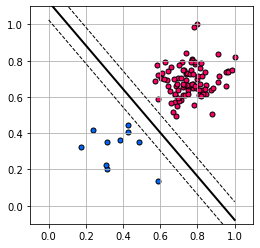

In [24]:
# load in data
X,y = load_data('data/imbalanced_2class.csv')

# run gradient descent
w = squared_margin_grad(X,y)

# plot points and separator
plot_all_margin(X,y,w)

### Exercise 4-8

This time we will be using Newton's method in order to define a margin classifier between the classes of overlapping 2 class data from Exercise 4-4.


<br>
    <center> $ H = 2 \sum_{p=1}^{P} \tilde{x}_{p} \tilde{x}_{p}^{T}$<br><br>$p: 1-y_{p}\tilde{x}_{p}^{T}\tilde{w} > 0$  </center> 


In [25]:
### TODO: YOUR CODE GOES HERE ###
# run newton's method
def newtons_method(X,y):
    # begin newton's method loop
    max_its = 20
    w = np.random.randn(3,1);        # random initial point

    for k in range(max_its):
        
        ## fill here
        grad_w = -2 * np.sum(np.maximum(0, 1 - y * X.T @ w) * y * X.T, 0, keepdims=True).T
        
        # (1 - y * X.T @ w) > 0 gives a True False matrix for relative indexes according to whether they imply the rule or not
        
        new_X = ((1 - y * X.T @ w) > 0) * X.T  #the samples that implies the rule are included in new_X
        
        H = 2 * (new_X.T @ new_X)
        
        
        w = w - (np.linalg.inv(H) @ grad_w)
        
        
    return w

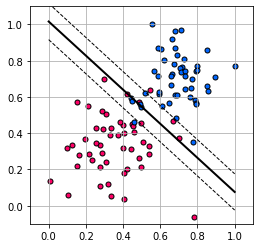

In [26]:
# load data
X,y = load_data('data/overlapping_2class.csv')

# run newtons method to minimize squared margin or SVM cost
w = newtons_method(X,y)

# plot everything - including data and separator
plot_all_margin(X,y,w)

### Exercise 4-9

Now, we will compare the performance of soft and margin class perceptrons on breast cancer dataset.

Let's load and examine the data.

In [27]:
def load_data(csvname):
    # load in data
    data = np.asarray(pd.read_csv(csvname))

    # import data and reshape appropriately
    X = data[:,0:-1]
    y = data[:,-1]
    y.shape = (len(y),1)
    
    # pad data with ones for more compact gradient computation
    o = np.ones((np.shape(X)[0],1))
    X = np.concatenate((o,X),axis = 1)
    X = X.T
    
    return X,y

In [28]:
# load data
X,y = load_data('data/breast_cancer_dataset.csv')

print("Number of samples: ", X.shape[1])
print("Number of features: ", X.shape[0])
print("Number of malignant samples (class -1): ", np.sum(y==-1))
print("Number of benign samples (class 1): ", np.sum(y==1))


Number of samples:  698
Number of features:  9
Number of malignant samples (class -1):  241
Number of benign samples (class 1):  457


In [29]:
### TODO: YOUR CODE GOES HERE ###
# run newton's method
def squared_margin_newtons_method(X,y,w):
    # begin newton's method loop    
    max_its = 20
    misclass_history = []
    for k in range(max_its):

        ## fill here
        grad_w = -2 * np.sum(np.maximum(0, 1 - y * X.T @ w) * y * X.T, 0, keepdims=True).T
        
        # (1 - y * X.T @ w) > 0 gives a True False matrix for relative indexes according to whether they imply the rule or not
        
        new_X = ((1 - y * X.T @ w) > 0) * X.T  #the samples that implies the rule are included in new_X
        
        H = 2 * (new_X.T @ new_X)
        
        
        w = w - (np.linalg.inv(H) @ grad_w)
        
        c = count_misclasses(X, y, w)
        misclass_history.append(c)
        
    return misclass_history

In [31]:
# run newton's method 
def softmax_newtons_method(X,y,w):
    # begin newton's method loop
    max_its = 20
    misclass_history = []
    
    for k in range(max_its):

        ## fill here
        s = sigmoid(-y * (X.T @ w))
        grad_w = -X @ (s * y)
        
        H = ((s * (1-s)).T * X) @ X.T
        
        w = w - (np.linalg.inv(H) @ grad_w)
        
        c = count_misclasses(X, y, w)
        misclass_history.append(c)
        
        
    return misclass_history

In [32]:
# function for counting the number of misclassifications
def count_misclasses(X,y,w):
    y_pred = np.sign(np.dot(X.T,w))
    num_misclassed = len(y) - len([i for i, j in zip(y, y_pred) if i == j])
    return num_misclassed

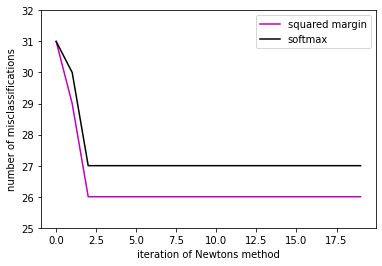

In [33]:
# run newtons method to minimize squared margin or SVM cost
w = np.zeros((np.shape(X)[0],1))
squared_margin_history = squared_margin_newtons_method(X,y,w)

# run newtons method to minimize logistic regression or softmax cost
w = np.zeros((np.shape(X)[0],1))
softmax_cost_history = softmax_newtons_method(X,y,w)

# plot results
plt.plot(squared_margin_history,color = 'm')
plt.plot(softmax_cost_history,'k')

# clean up plot
plt.ylim([min(min(squared_margin_history),min(softmax_cost_history)) - 1,max(max(squared_margin_history),max(softmax_cost_history)) + 1])
plt.xlabel('iteration of Newtons method')
plt.ylabel('number of misclassifications')
plt.legend(['squared margin','softmax'])
plt.show()

### Exercise 4-10

Now, we will compare the performance of soft and margin class perceptrons on face dataset, this time gradient descent method will be used for minimizing the cost.

Let's load and examine the data.

In [34]:
# load data
X,y = load_data('data/feat_face_data.csv')

print("Number of samples: ", X.shape[1])
print("Number of features: ", X.shape[0])
print("Number of non-face samples (class -1): ", np.sum(y==-1))
print("Number of face samples (class 1): ", np.sum(y==1))

Number of samples:  9999
Number of features:  497
Number of non-face samples (class -1):  7000
Number of face samples (class 1):  2999


In [35]:
### TODO: YOUR CODE GOES HERE ###
# run gradient descent
def squared_margin_grad(X,y,w):
    # begin gradient descent loop    
    max_its = 100
    misclass_history = []
    alpha = 10**-4
    for k in range(max_its):
        
        ## fill here
        grad_w = -2 * np.sum(np.maximum(0, 1 - y * X.T @ w) * y * X.T, 0, keepdims=True).T
        
        w = w - alpha * grad_w
        
        c = count_misclasses(X, y, w)
        misclass_history.append(c)
        
    return misclass_history

In [36]:
# run gradient descent method
def softmax_grad(X,y,w):
    # begin gradient descent loop
    max_its = 100
    misclass_history = []
    alpha = 10**-3
    for k in range(max_its):

        ## fill here
        s = sigmoid(-y * (X.T @ w))
        grad_w = -X @ (s * y)
        
        w = w - alpha * grad_w
        
        c = count_misclasses(X, y, w)
        misclass_history.append(c)
        
        
    return misclass_history

In [37]:
# function for counting the number of misclassifications
def count_misclasses(X,y,w):
    y_pred = np.sign(np.dot(X.T,w))
    num_misclassed = len(y) - len([i for i, j in zip(y, y_pred) if i == j])
    return num_misclassed

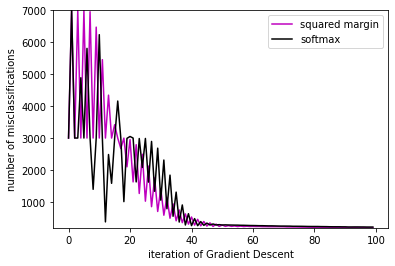

In [38]:
# run gradient descent method to minimize squared margin or SVM cost
w = np.zeros((np.shape(X)[0],1))
squared_margin_history = squared_margin_grad(X,y,w)

# run gradient descent method to minimize logistic regression or softmax cost
w = np.zeros((np.shape(X)[0],1))
softmax_cost_history = softmax_grad(X,y,w)

# plot results
plt.plot(squared_margin_history,color = 'm')
plt.plot(softmax_cost_history,'k')

# clean up plot
plt.ylim([min(min(squared_margin_history),min(softmax_cost_history)) - 1,max(max(squared_margin_history),max(softmax_cost_history)) + 1])
plt.xlabel('iteration of Gradient Descent')
plt.ylabel('number of misclassifications')
plt.legend(['squared margin','softmax'])
plt.show()

### Extra Exercise

This time, we will implement gradient descent in order to find the soft and margin perceptrons on (a) breast cancer data and (b) face data using 5-fold cross validation.

In [39]:
def squared_margin_grad(X,y,w):
    # begin gradient descent   
    max_its = 100
    misclass_history = []
    alpha = 10**-4
    for k in range(max_its):
        grad_w = -2 * np.sum(np.maximum(0, 1-(y * X.T) @ w)* y*X.T, 0, keepdims=True).T
        w = w - alpha * grad_w
        
        
    return w

# run newton's method 
def softmax_grad(X,y,w):
    # begin gradient descent
    max_its = 100
    misclass_history = []
    alpha = 10**-3
    for k in range(max_its):

        grad_w = -X @ (sigmoid(-y * (X.T @ w))*y)
        w = w - alpha * grad_w
    
    return w

Let's use 5 fold cross validation and see the results of soft and margin perceptrons.

In [40]:

def train(X,y):
    
    cv_splits = KFold(5, shuffle=True, random_state=44)
    
    margin_accs = []
    soft_accs= []
    
    for n, (train_index, test_index) in enumerate(cv_splits.split(X)):
        X_train, X_test, y_train, y_test = X[:,train_index], X[:,test_index], y[train_index], y[test_index]

        # run gradient descent to minimize squared margin or SVM cost
        w = np.zeros((np.shape(X_train)[0],1))
        w_margin = squared_margin_grad(X_train,y_train,w)

        # run gradient descent to minimize logistic regression or softmax cost
        w = np.zeros((np.shape(X_train)[0],1))
        w_soft = softmax_grad(X_train,y_train,w)


        margin_acc = 1 - (count_misclasses(X_test, y_test, w_margin)/X.shape[1])
        soft_acc = 1 - (count_misclasses(X_test, y_test, w_soft)/X.shape[1])

        margin_accs.append(margin_acc)
        soft_accs.append(soft_acc)

    print("Margin perceptron cross validation results: ", np.mean(margin_accs), "+/-", np.std(margin_accs))
    print("Soft perceptron cross validation results: ", np.mean(soft_accs), "+/-", np.std(soft_accs) )    


In [41]:
X,y = load_data('data/breast_cancer_dataset.csv')

train(X,y)

Margin perceptron cross validation results:  0.9994269340974211 +/- 0.0007018595251527716
Soft perceptron cross validation results:  0.9994269340974211 +/- 0.0007018595251527716


In [42]:
X,y = load_data('data/feat_face_data.csv')

train(X,y)

Margin perceptron cross validation results:  1.0 +/- 0.0
Soft perceptron cross validation results:  1.0 +/- 0.0
